<a href="https://colab.research.google.com/github/khlodMohamed/Machine-learning/blob/main/VQA/VQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes:


1.   We start by using pretrained weights then we train them on our data
2.   https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
3. For simplification I (M. Ragab) took the first answer in list of answers provided for each question.
4. Questions and Answers could be more efficient by removing redundancies (make all lower case, remove punctuations, ... and so on), check example in API files, vqaEval.py
5. We can extract features from images using classify function

# **Downloading VizWiz Dataset**

**Downloading Data**

In [ ]:
# Downloading Data
%mkdir /content/data/
%cd /content/data

!wget https://ivc.ischool.utexas.edu/VizWiz_final/vqa_data/Annotations.zip
!wget https://ivc.ischool.utexas.edu/VizWiz_final/images/train.zip
# !wget https://ivc.ischool.utexas.edu/VizWiz_final/images/val.zip
# !wget https://ivc.ischool.utexas.edu/VizWiz_final/images/test.zip

# Unzipping Data
!unzip Annotations.zip
!unzip train.zip
# !unzip test.zip
# !unzip val.zip

# Remove unnecessary files
# %rm val.zip
# %rm test.zip
%rm train.zip
%rm Annotations.zip


# **Extracting Data** <br>
We have 3 lists

1.   List of Image Names (including their extension)
2.   List of Questions
3.   List of first Answer in each List of (List of Answers) --> Choosing only one answer from list of answers provided with each question

For example: index 0 for 3 lists represent name/path of the first picture, question of first picture and first answer to question of first picture respectively


In [ ]:
import json

# Reading data from json file
def read_json_file(file_name):
    with open(file_name, 'r') as f:
        data = json.load(f)
    return data
    

# Extracting Image name, questions and answers from json file
def extract_data(data):
    image_names = []
    questions = []
    answers = []
    for i in range(len(data)):
        image_names.append(data[i]['image'])
        questions.append(data[i]['question'])
        answers.append(data[i]['answers'])
    
    # Getting all answers of an answer into a list
    all_answers = []
    for i in range(len(answers)):
        item_list = []
        for item in answers[i]:
            item_list.append(item['answer'])
        all_answers.append(item_list)


    return image_names, questions, all_answers

def first_answer_only(l):
    return [x[0] for x in l]

train_data = read_json_file('/content/data/Annotations/train.json')
train_image_names, train_questions, train_answers = extract_data(train_data)

train_answers = first_answer_only(train_answers)

print('Images Name List')
print(train_image_names[:10])
print('Questions List')
print(train_questions[:10])
print('Answers List')
print(train_answers[:10])
print('Number of Images')
print(len(train_image_names))
print('Number of Questions')
print(len(train_questions))
print('Number of Answers')
print(len(train_answers))


Images Name List
['VizWiz_train_00000000.jpg', 'VizWiz_train_00000001.jpg', 'VizWiz_train_00000002.jpg', 'VizWiz_train_00000003.jpg', 'VizWiz_train_00000004.jpg', 'VizWiz_train_00000005.jpg', 'VizWiz_train_00000006.jpg', 'VizWiz_train_00000007.jpg', 'VizWiz_train_00000008.jpg', 'VizWiz_train_00000009.jpg']
Questions List
["What's the name of this product?", 'Can you tell me what is in this can please?', 'Is this enchilada sauce or is this tomatoes?  Thank you.', 'What is the captcha on this screenshot?', 'What is this item?', "What's this?", 'What is in this bottle?', 'This item.', 'What color do these look?', 'Surface look clean? Thank you.']
Answers List
['basil leaves', 'soda', 'these tomatoes not enchilada sauce', 't36m', 'solar garden light', 'boots', 'antiseptic mouthrinse', 'monitor cleaning kit', 'orange', 'yes']
Number of Images
20523
Number of Questions
20523
Number of Answers
20523


# **Resnet50 Pretrained Classifier**
Cannot preprocess all images at once because of low memory problem (still working on it)

/content/data/train
5992704


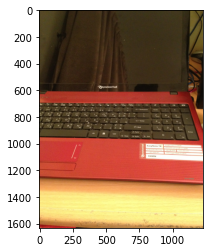

In [ ]:
# function to view image
%cd /content/data/train
def view_image(file):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img = mpimg.imread(file)
    print(img.size)
    plt.imshow(img)
    plt.show()

view_image("VizWiz_train_00008984.jpg")

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    model = tf.keras.applications.resnet50.ResNet50()
    prediction = model.predict(img_preprocessed)

    print(decode_predictions(prediction, top=3)[0])

classify("VizWiz_train_00008984.jpg")

2.7.0
49152/35363 [=========================================] - 0s 0us/step
[('n03832673', 'notebook', 0.45347357), ('n03642806', 'laptop', 0.18525715), ('n03085013', 'computer_keyboard', 0.08149989)]


In [ ]:
# Preprocess Images
def preprocess_images(list_of_imgs):
  preprocessed_images = []
  for img in list_of_imgs:
    print("Preprocessing ... {}".format(img))
    img = image.load_img(img, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    preprocessed_images.append(img_preprocessed)
  return preprocessed_images

preprocessed_images = np.array(preprocess_images(train_image_names[:1000])) #preprocess 1000 images
print(preprocessed_images.shape)

Preprocessing ... VizWiz_train_00000000.jpg
Preprocessing ... VizWiz_train_00000001.jpg
Preprocessing ... VizWiz_train_00000002.jpg
Preprocessing ... VizWiz_train_00000003.jpg
Preprocessing ... VizWiz_train_00000004.jpg
Preprocessing ... VizWiz_train_00000005.jpg
Preprocessing ... VizWiz_train_00000006.jpg
Preprocessing ... VizWiz_train_00000007.jpg
Preprocessing ... VizWiz_train_00000008.jpg
Preprocessing ... VizWiz_train_00000009.jpg
Preprocessing ... VizWiz_train_00000010.jpg
Preprocessing ... VizWiz_train_00000011.jpg
Preprocessing ... VizWiz_train_00000012.jpg
Preprocessing ... VizWiz_train_00000013.jpg
Preprocessing ... VizWiz_train_00000014.jpg
Preprocessing ... VizWiz_train_00000015.jpg
Preprocessing ... VizWiz_train_00000016.jpg
Preprocessing ... VizWiz_train_00000017.jpg
Preprocessing ... VizWiz_train_00000018.jpg
Preprocessing ... VizWiz_train_00000019.jpg
Preprocessing ... VizWiz_train_00000020.jpg
Preprocessing ... VizWiz_train_00000021.jpg
Preprocessing ... VizWiz_train_0

# **Word Embedding + Q/A Preprocessing**

##Q/A Preprocessing

In [ ]:
import re
manualMap    = { 'none': '0',
							  'zero': '0',
							  'one': '1',
							  'two': '2',
							  'three': '3',
							  'four': '4',
							  'five': '5',
							  'six': '6',
							  'seven': '7',
							  'eight': '8',
							  'nine': '9',
							  'ten': '10'
							}
articles     = ['a',
							 'an',
							 'the'
							]
contractions = {"aint": "ain't", "arent": "aren't", "cant": "can't", "couldve": "could've", "couldnt": "couldn't", \
							 "couldn'tve": "couldn't've", "couldnt've": "couldn't've", "didnt": "didn't", "doesnt": "doesn't", "dont": "don't", "hadnt": "hadn't", \
							 "hadnt've": "hadn't've", "hadn'tve": "hadn't've", "hasnt": "hasn't", "havent": "haven't", "hed": "he'd", "hed've": "he'd've", \
							 "he'dve": "he'd've", "hes": "he's", "howd": "how'd", "howll": "how'll", "hows": "how's", "Id've": "I'd've", "I'dve": "I'd've", \
							 "Im": "I'm", "Ive": "I've", "isnt": "isn't", "itd": "it'd", "itd've": "it'd've", "it'dve": "it'd've", "itll": "it'll", "let's": "let's", \
							 "maam": "ma'am", "mightnt": "mightn't", "mightnt've": "mightn't've", "mightn'tve": "mightn't've", "mightve": "might've", \
							 "mustnt": "mustn't", "mustve": "must've", "neednt": "needn't", "notve": "not've", "oclock": "o'clock", "oughtnt": "oughtn't", \
							 "ow's'at": "'ow's'at", "'ows'at": "'ow's'at", "'ow'sat": "'ow's'at", "shant": "shan't", "shed've": "she'd've", "she'dve": "she'd've", \
							 "she's": "she's", "shouldve": "should've", "shouldnt": "shouldn't", "shouldnt've": "shouldn't've", "shouldn'tve": "shouldn't've", \
							 "somebody'd": "somebodyd", "somebodyd've": "somebody'd've", "somebody'dve": "somebody'd've", "somebodyll": "somebody'll", \
							 "somebodys": "somebody's", "someoned": "someone'd", "someoned've": "someone'd've", "someone'dve": "someone'd've", \
							 "someonell": "someone'll", "someones": "someone's", "somethingd": "something'd", "somethingd've": "something'd've", \
							 "something'dve": "something'd've", "somethingll": "something'll", "thats": "that's", "thered": "there'd", "thered've": "there'd've", \
							 "there'dve": "there'd've", "therere": "there're", "theres": "there's", "theyd": "they'd", "theyd've": "they'd've", \
							 "they'dve": "they'd've", "theyll": "they'll", "theyre": "they're", "theyve": "they've", "twas": "'twas", "wasnt": "wasn't", \
							 "wed've": "we'd've", "we'dve": "we'd've", "weve": "we've", "werent": "weren't", "whatll": "what'll", "whatre": "what're", \
							 "whats": "what's", "whatve": "what've", "whens": "when's", "whered": "where'd", "wheres": "where's", "whereve": "where've", \
							 "whod": "who'd", "whod've": "who'd've", "who'dve": "who'd've", "wholl": "who'll", "whos": "who's", "whove": "who've", "whyll": "why'll", \
							 "whyre": "why're", "whys": "why's", "wont": "won't", "wouldve": "would've", "wouldnt": "wouldn't", "wouldnt've": "wouldn't've", \
							 "wouldn'tve": "wouldn't've", "yall": "y'all", "yall'll": "y'all'll", "y'allll": "y'all'll", "yall'd've": "y'all'd've", \
							 "y'alld've": "y'all'd've", "y'all'dve": "y'all'd've", "youd": "you'd", "youd've": "you'd've", "you'dve": "you'd've", \
							 "youll": "you'll", "youre": "you're", "youve": "you've"}

punct        = [';', r"/", '[', ']', '"', '{', '}',
							 '(', ')', '=', '+', '\\', '_', '-',
							 '>', '<', '@', '`', ',', '?', '!']
periodStrip  = re.compile("(?!<=\d)(\.)(?!\d)")
commaStrip   = re.compile("(\d)(\,)(\d)")


In [ ]:
def processPunctuation(inText):
		outText = inText
		for p in punct:
			if (p + ' ' in inText or ' ' + p in inText) or (re.search(commaStrip, inText) != None):
				outText = outText.replace(p, '')
			else:
				outText = outText.replace(p, ' ')
		outText = periodStrip.sub("",
									  outText,
									  re.UNICODE)
		return outText
    
def processDigitArticle(inText):
		outText = []
		tempText = inText.lower().split()
		for word in tempText:
			word = manualMap.setdefault(word, word)
			if word not in articles:
				outText.append(word)
			else:
				pass
		for wordId, word in enumerate(outText):
			if word in contractions:
				outText[wordId] = contractions[word]
		outText = ' '.join(outText)
		return outText


In [ ]:
pre_answers=train_answers.copy()
pre_questions=train_questions.copy()
for i,x in enumerate(train_questions):
   train_questions[i]=(processPunctuation(train_questions[i]))
   train_questions[i]=(processDigitArticle(train_questions[i]))

for i,x in enumerate(train_answers):
   train_answers[i]=(processPunctuation(train_answers[i]))
   train_answers[i]=(processDigitArticle(train_answers[i]))

print(pre_questions[:10])
print(train_questions[:10])
print(pre_answers[:10])
print(train_answers[:10])


["What's the name of this product?", 'Can you tell me what is in this can please?', 'Is this enchilada sauce or is this tomatoes?  Thank you.', 'What is the captcha on this screenshot?', 'What is this item?', "What's this?", 'What is in this bottle?', 'This item.', 'What color do these look?', 'Surface look clean? Thank you.']
["what's name of this product", 'can you tell me what is in this can please', 'is this enchilada sauce or is this tomatoes thank you', 'what is captcha on this screenshot', 'what is this item', "what's this", 'what is in this bottle', 'this item', 'what color do these look', 'surface look clean thank you']
['basil leaves', 'soda', 'these tomatoes not enchilada sauce', 't36m', 'solar garden light', 'boots', 'antiseptic mouthrinse', 'monitor cleaning kit', 'orange', 'yes']
['basil leaves', 'soda', 'these tomatoes not enchilada sauce', 't36m', 'solar garden light', 'boots', 'antiseptic mouthrinse', 'monitor cleaning kit', 'orange', 'yes']


##Word Embedding

In [ ]:
%cd /content/data

/content/data


In [ ]:
# Download Pretrained Word Vectors (GloVe)
%cd /content/data

!wget "https://nlp.stanford.edu/data/glove.6B.zip"
!unzip glove.6B.zip

/content/data
--2022-02-04 17:05:04--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-04 17:05:04--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.13MB/s    in 2m 40s  

2022-02-04 17:07:45 (5.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Preprocess Questions into Vectors
def tokenize_input(input_list):
  t = Tokenizer()
  t.fit_on_texts(input_list)
  vocab_size = len(t.word_index) + 1
  # integer encode the questions
  encoded_input = t.texts_to_sequences(input_list)
  max_length = count_words(input_list)
  print(max_length)
  padded_input = pad_sequences(encoded_input, maxlen=max_length, padding='post')
  return padded_input, t, vocab_size

def count_words(input):
    max_count = 0
    for string in input:
        count = 0
        for word in string.split():
            count += 1
        if count > max_count:
            max_count = count
    return max_count

def get_max_list_len(lists):
    max_len = 0
    for lst in lists:
        if len(lst) > max_len:
            max_len = len(lst)
    return max_len

# print index of longest list in a list of lists
def print_longest_list_index(lists):
    max_len = get_max_list_len(lists)
    for i in range(len(lists)):
        if len(lists[i]) == max_len:
            print(i)

# load the whole embedding into memory
embeddings_index = dict() 
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

encoded_train_questions, t, vocab_size = tokenize_input(train_questions)


# create a weight matrix for words in training ques
embedding_matrix = zeros((vocab_size, 100)) # Use Embedding Matrix as weights for Embedding Layer
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
  

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(np.array(train_answers))
categorical_answers = to_categorical(vec)
print(len(categorical_answers[10]))

Loaded 400000 word vectors.
56
8118


In [ ]:
import csv
# export list of list to csv file
def export_list_to_csv(list_of_lists, file_name):
    with open(file_name, 'w') as csv_file:
        writer = csv.writer(csv_file)
        for lst in list_of_lists:
            writer.writerow(lst)

# read list of list of numbers from csv file 
def read_list_from_csv(file_name):
    with open(file_name, 'r') as csv_file:
        reader = csv.reader(csv_file)
        list_of_lists = []
        for row in reader:
            list_of_lists.append(row)
    return list_of_lists

# convert list of list of strings to list of list of numbers
def convert_list_of_list_of_strings_to_list_of_list_of_numbers(list_of_list_of_strings):
    list_of_list_of_numbers = []
    for lst in list_of_list_of_strings:
        list_of_numbers = []
        for string in lst:
            list_of_numbers.append(float(string))
        list_of_list_of_numbers.append(list_of_numbers)
    return list_of_list_of_numbers
export_list_to_csv(embedding_matrix, "emb.csv")

In [ ]:
import pickle

# saving
with open('/content/drive/MyDrive/tokenizer.pickle', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(vec[673])
print(label_encoder.classes_)

1150
['#s 2 10' '$1' '$1.00 bill' ... 'zoo' 'zoom out entire label not visible'
 'zxj']


In [ ]:
# saving
with open('/content/drive/MyDrive/le.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# saving
with open('/content/drive/MyDrive/vec.pickle', 'wb') as handle:
    pickle.dump(vec, handle, protocol=pickle.HIGHEST_PROTOCOL)

# **VQA Model**

## **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

train_image_names, test_image_names, train_questions, test_questions, train_answers, test_answers = train_test_split(image_names, questions, answers, test_size= 0.2, random_state= 1)
train_image_names, val_image_names, train_questions, val_questions, train_answers, val_answers = train_test_split(train_image_names, train_questions, train_answers, test_size= 0.25, random_state= 1)

print('TRAIN')
print('Number of Images')
print(len(train_image_names))
print('Number of Questions')
print(len(train_questions))
print('Number of Answers')
print(len(train_answers))


print('VALIDATION')
print('Number of Images')
print(len(val_image_names))
print('Number of Questions')
print(len(val_questions))
print('Number of Answers')
print(len(val_answers))


print('TEST')
print('Number of Images')
print(len(test_image_names))
print('Number of Questions')
print(len(test_questions))
print('Number of Answers')

## **Building the Model**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Input, LSTM, Embedding, Dense, Multiply
from keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import keras
from tensorflow.keras.optimizers import Adam

"""
  Parameters Used While Building the Model from previous cells
"""
# Input Questions --> encoded_train_questions
# Input Length (Question) --> 56
# Embedding Layer Weights --> embedding_matrix
# Input Images --> ??
# Labels --> categorical_answers



def build_model():
  # Define CNN for Image Input
  im_input= Input(shape = (224, 224, 3), name = 'Image')
  resnet = tf.keras.applications.resnet50.ResNet50()
  res_model = Sequential([
              im_input, resnet, Dense(units= 1024, activation = 'relu')        
  ])
  print(res_model.summary())

  # Define RNN for language input
  embedding_dim = 100
  q_input = Input(shape=(encoded_train_questions.shape[1]), dtype='int32', name = 'Question')
  embedding_layer = Embedding(vocab_size, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), name= 'embedding')
  lstm_layer = LSTM(units = 2048, name= 'LSTM')
  fc_layer= Dense(units = 1024, activation ='relu')
  rnn_model = Sequential([q_input, embedding_layer, lstm_layer, fc_layer]) #rename var
  
#Koshary is my favourite ...., pizzas and pastas 

  print(rnn_model.summary())

  # Combine CNN and RNN to create the final model
  merged = Multiply(name= 'Merge')([rnn_model.output, res_model.output])
  output = Dense(8118, activation='softmax', name= 'Output')(merged)

  
  vqa_model = Model(inputs=[im_input, q_input], outputs= output)
  vqa_model.compile(Adam(learning_rate= 5e-4), loss= 'categorical_crossentropy', metrics=['accuracy'])
  return vqa_model

model=  build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 1024)              1025024   
                                                                 
Total params: 26,661,736
Trainable params: 26,608,616
Non-trainable params: 53,120
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 56, 100)           389600    
                                                                 
 LSTM (LSTM)                 (None, 2048)              17604608  
                                                                 
 dense_1 (De

## **Plotting the Model**

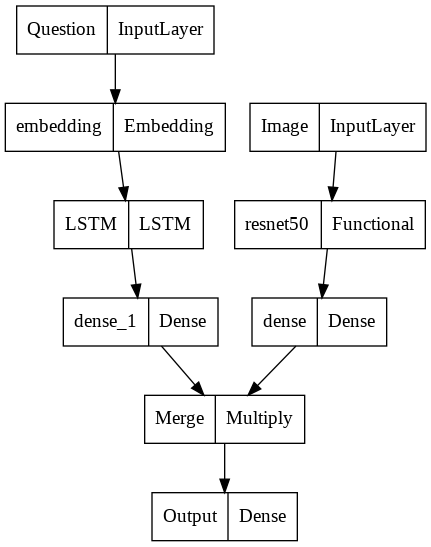

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png')

## **Training the Model**

In [ ]:
model.fit(
    x= [np.vstack(preprocessed_images), encoded_train_questions[:1000]],
    y= categorical_answers[:1000],
    epochs = 10
    )
model.save_weights('/content/drive/MyDrive/vqa_weights.h5')

Epoch 1/10
32/32 [==============================] - 22s 395ms/step - loss: 8.9377 - accuracy: 0.1210
Epoch 2/10
32/32 [==============================] - 12s 364ms/step - loss: 6.8954 - accuracy: 0.1520
Epoch 3/10
32/32 [==============================] - 12s 366ms/step - loss: 5.6849 - accuracy: 0.1480
Epoch 4/10
32/32 [==============================] - 12s 368ms/step - loss: 5.3869 - accuracy: 0.1470
Epoch 5/10
32/32 [==============================] - 12s 372ms/step - loss: 5.2675 - accuracy: 0.1310
Epoch 6/10
32/32 [==============================] - 12s 374ms/step - loss: 5.2062 - accuracy: 0.1380
Epoch 7/10
32/32 [==============================] - 12s 374ms/step - loss: 5.1429 - accuracy: 0.1480
Epoch 8/10
32/32 [==============================] - 12s 373ms/step - loss: 5.0735 - accuracy: 0.1530
Epoch 9/10
32/32 [==============================] - 12s 371ms/step - loss: 5.0267 - accuracy: 0.1490
Epoch 10/10
32/32 [==============================] - 12s 370ms/step - loss: 4.9733 - accura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls /content/drive

MyDrive/


# **Utility**

In [ ]:
def classify_img(images):
    model = tf.keras.applications.resnet50.ResNet50()
    prediction = model.predict(np.vstack(images))
    return (decode_predictions(prediction, top=3))

preprocessed_images_np = np.array(preprocessed_images)
preprocessed_images_np = np.reshape(preprocessed_images_np, (10, 224,224,3))

op = classify_img(np.array(preprocessed_images))
for entry in op:
  print(entry)

[('n04557648', 'water_bottle', 0.3785451), ('n15075141', 'toilet_tissue', 0.1468604), ('n03983396', 'pop_bottle', 0.10017531)]
[('n03400231', 'frying_pan', 0.14656764), ('n02841315', 'binoculars', 0.14319111), ('n04330267', 'stove', 0.14189847)]
[('n03871628', 'packet', 0.45064098), ('n02951585', 'can_opener', 0.12394803), ('n02823428', 'beer_bottle', 0.07289935)]
[('n06359193', 'web_site', 0.99934655), ('n03485407', 'hand-held_computer', 0.0003674352), ('n04152593', 'screen', 5.7563644e-05)]
[('n03871628', 'packet', 0.13012712), ('n04235860', 'sleeping_bag', 0.07260396), ('n03787032', 'mortarboard', 0.058704652)]
[('n04553703', 'washbasin', 0.1275238), ('n02808440', 'bathtub', 0.10170215), ('n04023962', 'punching_bag', 0.08921865)]
[('n03871628', 'packet', 0.1561401), ('n03937543', 'pill_bottle', 0.12561138), ('n04357314', 'sunscreen', 0.121968575)]
[('n02966687', "carpenter's_kit", 0.48288217), ('n03492542', 'hard_disc', 0.14928964), ('n04525305', 'vending_machine', 0.07985855)]
[('n